In [54]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

'c:\\Users\\jcrl\\Desktop\\Social-Data-Project'

In [53]:
# enhedsomraade 
cols = ['kategori','id','ny_dm_element','traeart','slaegtsnavn','planteaar','bydelsnavn','byrumstype','vejnavn','fritrumsprofil','stammeomfang','placering','omgivelse','reg_dato','opdateret_dato','wkb_geometry']
df = pd.read_csv('data/trae_basis.csv',sep=',',usecols=cols)
#drop_columns = ['FID','under_element','arbsted_tekst_id','plantet_halvaar','vaekstsaeson','underordnet_stednavn','omraade','kronediameter','vaekstmedie','beskyttelse','sundhed','skudtilsvaekst','andre_vaekstforhold','bevaringsvaerdi','driftstatus_gadetrae','garantiperioden_udloeber','vanding_i_aar','ejer','driftsorganisation','driftsorganisation_vanding','driftsaftale_edoc_nr','']
df.head()

,kategori,id,ny_dm_element,traeart,slaegtsnavn,planteaar,bydelsnavn,byrumstype,vejnavn,fritrumsprofil,stammeomfang,placering,omgivelse,reg_dato,opdateret_dato,wkb_geometry
0,gadetræ,2755,Gade- og allétræer,Platanus hybr. acerifolia,Platan,2008.0,Vanløse,Gader og pladser,Sallingvej,"4,5 m",40 - 60,Siderabat,Fast belægning,2011-07-01T00:00:00,2022-03-21T10:32:29.888,POINT (12.506472982261277 55.69325544860847)
1,gadetræ,79754,Gade- og allétræer,Tilia hybr. europaea 'Pallida',Lind,2005.0,Valby,Gader og pladser,Mølle Allé,"4,5 m",18 - 20,Fortov,Fast belægning,2016-04-07T09:47:27.171,2022-03-21T10:32:29.888,POINT (12.517024058234247 55.665248690540835)
2,gadetræ,84790,Gade- og allétræer,Tilia hybr. europaea 'Pallida',Lind,2018.0,Valby,Gader og pladser,Mølle Allé,"4,5 m",18 - 20,Fortov,Fast belægning,2018-01-08T00:00:00,2022-03-21T10:32:29.888,POINT (12.517473257630915 55.6651562247192)
3,gadetræ,79761,Formede træer,Tilia hybr. europaea 'Pallida',Lind,1960.0,Valby,Gader og pladser,Mølle Allé,"4,5 m",18 - 20,Fortov,Fast belægning,2016-04-07T09:47:27.171,2022-03-21T10:32:29.888,POINT (12.515573415316043 55.665570503006286)
4,gadetræ,6881,Gade- og allétræer,Robinia pseudoacacia 'Nyirsegi',Robinie,2008.0,Vesterbro-Kongens Enghave,Gader og pladser,Dannebrogsgade,"4,5 m",18 - 20,Fortov,Fast belægning,2011-07-01T00:00:00,2022-03-09T17:16:03.502,POINT (12.552988210062669 55.669186278185045)


In [21]:
df["planteaar"].unique()

array([2008., 2005., 2018., 1960., 2012., 2022., 1977., 2009., 2011.,
       2003., 2021., 1995., 2010., 1980., 1970., 2016., 2015., 2019.,
       2006., 2002., 2001., 1990., 1988., 1998., 1992., 2007., 1947.,
       2014., 2000., 1918., 1900., 2013., 1930., 1940., 1982., 2004.,
       1985., 1972., 1953., 2017., 1969., 2020., 1944., 1950., 1925.,
       1975., 1999., 1951., 1996., 1924., 1920., 1984., 1997., 1989.,
       1942., 1850., 1935., 1948.,   nan, 1936., 1991., 1971., 1976.,
       1994., 1978., 1906., 1965., 1941., 1974., 1973., 1979., 1952.,
          0., 1987., 1961., 1909., 1955., 1905., 1945., 1981., 1986.,
       1773., 1993., 1933., 1983., 1912., 1902., 1907., 1908., 1963.,
       1967., 1915., 1927., 1968., 1959., 1910., 1962., 1870., 1957.,
       1958., 1895., 1966., 1892., 1954., 1932., 1943., 1937., 1931.,
       1891., 1890., 1901., 1926., 1928., 1880., 1919., 1964., 1886.,
       1899., 1913., 1923., 1934., 1922., 1916., 1860., 1914., 1938.,
       1939., 1946.]

In [60]:
df["placering"].value_counts()

Ikke registreret    10604
Siderabat            7634
Fortov               4643
Grønt anlæg          3248
Vejareal             3183
Torv og plads        2145
Midterrabat          1581
Cykelsti              890
Name: placering, dtype: int64

In [61]:
df = df[df["planteaar"] > 1900]
df = df.dropna(subset=['planteaar'])
df["planteaar"].unique()


array([2008., 2005., 2018., 1960., 2012., 2022., 1977., 2009., 2011.,
       2003., 2021., 1995., 2010., 1980., 1970., 2016., 2015., 2019.,
       2006., 2002., 2001., 1990., 1988., 1998., 1992., 2007., 1947.,
       2014., 2000., 1918., 2013., 1930., 1940., 1982., 2004., 1985.,
       1972., 1953., 2017., 1969., 2020., 1944., 1950., 1925., 1975.,
       1999., 1951., 1996., 1924., 1920., 1984., 1997., 1989., 1942.,
       1935., 1948., 1936., 1991., 1971., 1976., 1994., 1978., 1906.,
       1965., 1941., 1974., 1973., 1979., 1952., 1987., 1961., 1909.,
       1955., 1905., 1945., 1981., 1986., 1993., 1933., 1983., 1912.,
       1902., 1907., 1908., 1963., 1967., 1915., 1927., 1968., 1959.,
       1910., 1962., 1957., 1958., 1966., 1954., 1932., 1943., 1937.,
       1931., 1901., 1926., 1928., 1919., 1964., 1913., 1923., 1934.,
       1922., 1916., 1914., 1938., 1939., 1946.])

# Hvilke træer
# Hvornår er træerne plantet - i hvilke år plantes der flest
# Hvilke typer træeer er plantet hvornår  
# Hvor store er træerne? Forskel på størrelse ift. bydele 
# 

(array([ 328.,   89.,  142.,   14.,  192.,   47.,   91.,  459.,  268.,
         224.,  404.,  101.,  333.,  280.,  489.,  147.,   99.,  754.,
        1764., 1140.,  814.,  406., 1536., 1655., 2317., 1891., 2072.,
        5332., 3839., 6701.]),
 array([1901.        , 1905.03333333, 1909.06666667, 1913.1       ,
        1917.13333333, 1921.16666667, 1925.2       , 1929.23333333,
        1933.26666667, 1937.3       , 1941.33333333, 1945.36666667,
        1949.4       , 1953.43333333, 1957.46666667, 1961.5       ,
        1965.53333333, 1969.56666667, 1973.6       , 1977.63333333,
        1981.66666667, 1985.7       , 1989.73333333, 1993.76666667,
        1997.8       , 2001.83333333, 2005.86666667, 2009.9       ,
        2013.93333333, 2017.96666667, 2022.        ]),
 <BarContainer object of 30 artists>)

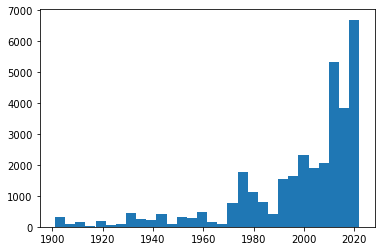

In [28]:
plt.hist(df["planteaar"], bins = 30)

A lot of trees in the late 1900 and start 2000.


In [78]:
df = df[df["stammeomfang"] != "Ikke registreret"]
df["stammeomfang"].unique()

array(['40 - 60', '18 - 20', '> 60', '30 - 40', '25 - 30', '20 - 25',
       '< 18'], dtype=object)

In [56]:
# Get the count of each value
value_counts = df['slaegtsnavn'].value_counts()

# Select the values where the count is less than 3 (or 5 if you like)
to_remove = value_counts[value_counts <= 5].index

# Keep rows where the city column is not in to_remove
df_sub = df[~df.slaegtsnavn.isin(to_remove)]
#df = df[df["slaegtsnavn"] > 1900]
df_sub["slaegtsnavn"].value_counts()

Lind                                5899
Eg                                  2473
Røn                                 2352
Platan                              2328
Ikke registreret                    2289
                                    ... 
Ene                                    8
Zelkova, ikke navngivet på dansk       7
Araucarie                              7
Slåen                                  7
Storaks                                6
Name: slaegtsnavn, Length: 69, dtype: int64

In [48]:
table1 = pd.pivot_table(df, values='id', index=["bydelsnavn"],
                    columns=['kategori'], aggfunc="count")
table1

kategori,Ikke defineret,gadetræ,parktræ,privat træ
bydelsnavn,,,,
Amager Vest,3.0,2765.0,2415.0,56.0
Amager Øst,22.0,1126.0,3024.0,125.0
Bispebjerg,NaN,1010.0,7492.0,158.0
Brønshøj-Husum,NaN,1024.0,3380.0,45.0
Indre By,2.0,2898.0,3153.0,280.0
Nørrebro,13.0,2466.0,4703.0,87.0
Valby,NaN,1845.0,3503.0,6.0
Vanløse,NaN,998.0,3178.0,44.0
Vesterbro-Kongens Enghave,NaN,2249.0,5064.0,35.0


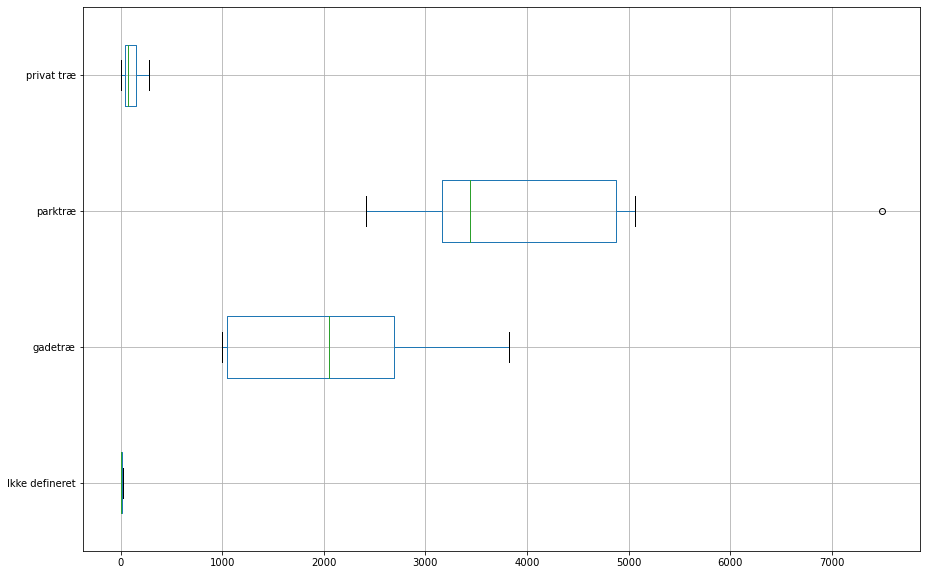

In [49]:
ax = table1.boxplot(vert=False, figsize=(15,10))
plt.show()

In [62]:
table2 = pd.pivot_table(df, values='id', index=["planteaar"],
                    columns=['placering'], aggfunc="count")
table2

placering,Cykelsti,Fortov,Grønt anlæg,Ikke registreret,Midterrabat,Siderabat,Torv og plads,Vejareal
planteaar,,,,,,,,
1901.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902.0,NaN,13.0,NaN,NaN,NaN,205.0,1.0,NaN
1905.0,NaN,43.0,NaN,52.0,NaN,NaN,NaN,NaN
1906.0,NaN,1.0,NaN,NaN,NaN,60.0,NaN,NaN
1907.0,NaN,5.0,1.0,NaN,NaN,1.0,3.0,NaN
...,...,...,...,...,...,...,...,...
2018.0,14.0,157.0,181.0,419.0,32.0,69.0,158.0,118.0
2019.0,22.0,119.0,39.0,555.0,29.0,80.0,733.0,121.0
2020.0,8.0,96.0,46.0,1166.0,38.0,214.0,42.0,113.0


<AxesSubplot:xlabel='planteaar'>

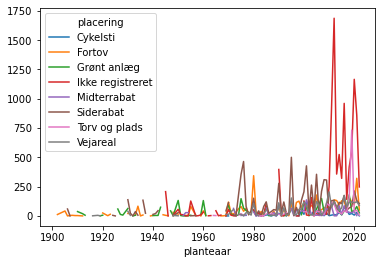

In [71]:
table2.plot()

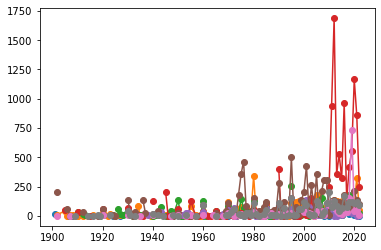

In [70]:
plt.plot(table2, label = "table2.columns()", marker='o')

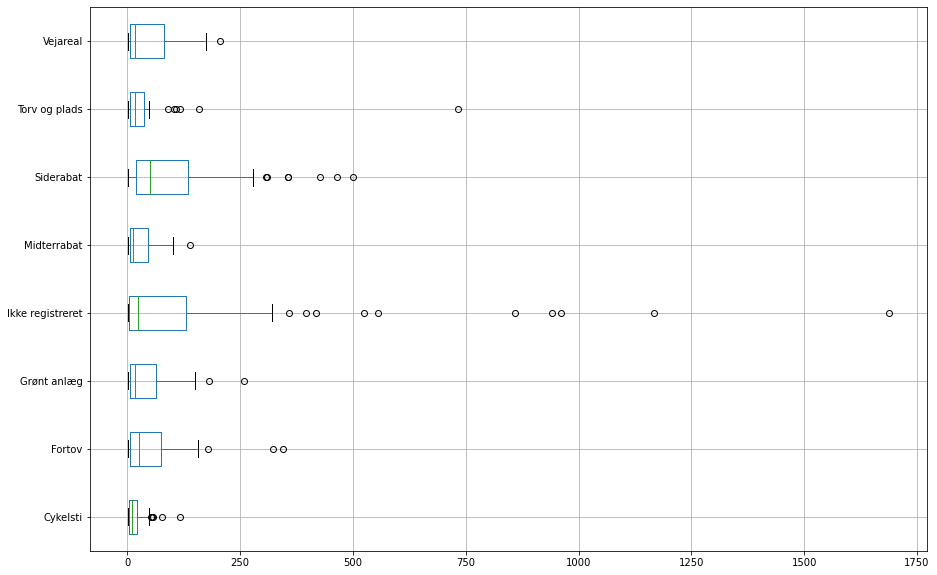

In [63]:
ax = table2.boxplot(vert=False, figsize=(15,10))
plt.show()

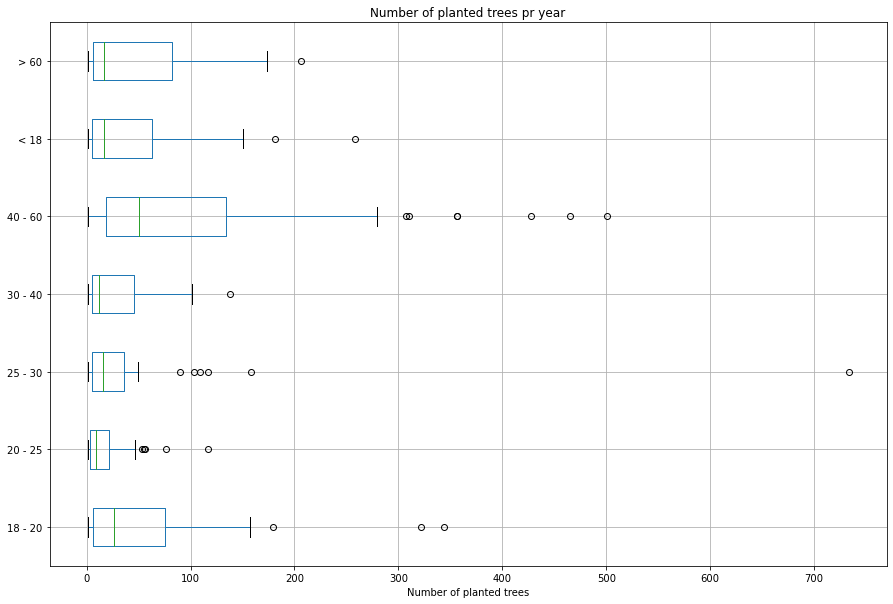

In [83]:
# Hvor store er træerne? Forskel på størrelse ift. bydele 
# bydelsnavn
# planteaar
table3 = pd.pivot_table(df, values='id', index=["planteaar"],
                    columns=['stammeomfang'], aggfunc="count")
ax = table3.boxplot(vert=False, figsize=(15,10))
ax.set_xlabel("Number of planted trees")
ax.set_title('Number of planted trees pr year')
plt.show()

<AxesSubplot:xlabel='planteaar'>

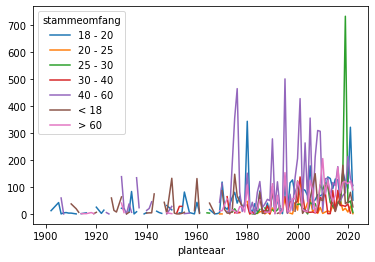

In [84]:
table3.plot()